In [22]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import torch
np.random.seed(42)

In [3]:
# # Matrix dimensions
# dims = {
#     'matrix1': (784, 64),   # First layer: 784 -> 128
#     'matrix2': (64, 64),   # Second layer: 128 -> 128
#     'matrix3': (64, 32),    # Third layer: 128 -> 64
#     'matrix4': (32, 10)      # Fourth layer: 64 -> 10
# }

# def create_weight_matrix(name, shape):
#     matrix = np.random.randint(-32, 31, size=shape, dtype=np.int64)
#     with open(f'{name}.mif', 'w') as mif_file:
#         for row in matrix:
#             for num in row:
#                 num_32bit = np.int32(num)
#                 unsigned_32bit = num_32bit & 0xFFFFFFFF
#                 mif_file.write(f'{unsigned_32bit:08X}\n')
#     return matrix

# # Generate all matrices
# # matrices = {name: create_weight_matrix(name, shape) 
# #            for name, shape in dims.items()}

In [4]:
# def visualize_digit(tensor):
#     """
#     Visualize a digit represented by a (1, 784) binary tensor.
    
#     Parameters:
#     tensor (numpy.ndarray): A (1, 784) numpy array representing the binary values of a digit.
#     """
#     # Reshape the tensor to a 28x28 matrix
#     digit_image = tensor.reshape(28, 28)
    
#     # Plot the image
#     plt.imshow(digit_image, cmap='gray')  # 'gray' for black and white images
#     plt.axis('off')  # Remove axis for a cleaner look
#     plt.show()


In [5]:
def save_img(X_train, y_train, idx):
    # Randomly select an image index
    print(f"Label: {y_train[idx]}")
    
    # Get the corresponding image data (reshape to a 28x28 matrix)
    image_data = X_train[idx].numpy()  # Convert to numpy array
    image_data = image_data.reshape(28, 28)  # Reshape if needed
    
    # Open file to save the image data in MIF format
    with open(f'image.mif', 'w') as file:
        # Iterate through each pixel and write it as 32-bit unsigned hex
        for i in range(28):
            for j in range(28):
                pixel = image_data[i, j]
                # Convert pixel to integer (0 or 1)
                int_pixel = int(pixel)  
                # Convert the integer to a 32-bit unsigned number (mask to ensure 32-bit)
                unsigned_32bit = np.int32(int_pixel) & 0xFFFFFFFF
                # Write the 32-bit unsigned value in hex
                file.write(f'{unsigned_32bit:08X}\n')

In [5]:
# # Assuming X_train, matrices, and output are defined
# # sample_idx = 400
# save_img(X_train, y_train, sample_idx)
# sample = X_train[sample_idx:sample_idx+1]  # Select the 6th sample
# x = sample
# visualize_digit(x)

# # Convert tensor to numpy and cast to int64 for matrix multiplication
# x = x.numpy().astype(np.int64)
# print(f"Input shape: {x.shape}")

# # Layer 1: (1,784) @ (784,128) -> (1,128)
# x1 = x @ matrices['matrix1']  # Matrix multiplication
# print(f"After Layer 1 (x1) shape: {x1.shape}")
# print("After Layer 1:")
# print(x1)

# # ReLU activation
# x1 = np.maximum(0, x1)  # ReLU
# print(f"After ReLU (x1) shape: {x1.shape}")
# print("After ReLU (x1):")
# print(x1)

# # Layer 2: (1,128) @ (128,128) -> (1,128)
# x2 = x1 @ matrices['matrix2']  # Matrix multiplication
# print(f"After Layer 2 (x2) shape: {x2.shape}")
# print("After Layer 2:")
# print(x2)

# # ReLU activation
# x2 = np.maximum(0, x2)  # ReLU
# print(f"After ReLU (x2) shape: {x2.shape}")
# print("After ReLU (x2):")
# print(x2)

# # Layer 3: (1,128) @ (128,64) -> (1,64)
# x3 = x2 @ matrices['matrix3']  # Matrix multiplication
# print(f"After Layer 3 (x3) shape: {x3.shape}")
# print("After Layer 3:")
# print(x3)

# # ReLU activation
# x3 = np.maximum(0, x3)  # ReLU
# print(f"After ReLU (x3) shape: {x3.shape}")
# print("After ReLU (x3):")
# print(x3)

# # Layer 4: (1,64) @ (64,10) -> (1,10)
# x4 = x3 @ matrices['matrix4']  # Matrix multiplication
# print(f"After Layer 4 (x4) shape: {x4.shape}")
# print("After Layer 4:")
# print(x4)

# # Output logits
# output = x4
# print(f"Output shape: {output.shape}")
# print("\nOutput logits:")
# print(output)

# # Predicted class
# predicted_class = np.argmax(output)
# print("\nPredicted class:", predicted_class)

In [6]:
def load_matrix_from_mif(filename, shape):
    """
    Loads a weight matrix from a .mif file and converts it from hexadecimal two's complement format.
    
    Parameters:
    - filename: str, path to the .mif file
    - shape: tuple, expected shape of the matrix (rows, columns)
    
    Returns:
    - matrix: numpy.ndarray, the loaded weight matrix
    """
    # Initialize an empty list to store the values
    values = []

    # Open and read the .mif file
    with open(filename, 'r') as mif_file:
        for line in mif_file:
            hex_value = line.strip()
            
            # Convert the hex string to a 32-bit unsigned integer
            unsigned_val = int(hex_value, 16)
            
            # Convert to a signed 32-bit integer using two's complement
            if unsigned_val >= 0x80000000:
                signed_val = unsigned_val - 0x100000000
            else:
                signed_val = unsigned_val
            
            # Append to the list of values
            values.append(signed_val)

    # Reshape the values list into the specified matrix shape
    matrix = np.array(values).reshape(shape)
    
    return matrix


In [23]:
# Define the expected matrix dimensions
dims = {
    'matrix1': (784, 64),
    'matrix2': (64, 64),
    'matrix3': (64, 32),
    'matrix4': (32, 10)
}

# Load all matrices from .mif files
matrices = {}
for name, shape in dims.items():
    filename = f'{name}.mif'
    matrices[name] = load_matrix_from_mif(filename, shape)

# Print shapes to verify
for name, matrix in matrices.items():
    print(f"{name} shape: {matrix.shape}")
    print(matrix)


matrix1 shape: (784, 64)
[[ -5  -5 -10 ... -10  -3   3]
 [ -3  -5   0 ...   5   0  -3]
 [  0 -10   0 ...   5   3   0]
 ...
 [  3  -3  10 ...  -8 -10  -3]
 [  0  -3   0 ...   0  10  10]
 [ -3 -15   5 ...  -3   3   3]]
matrix2 shape: (64, 64)
[[  0 -10   5 ... -19   5  -5]
 [-15   0 -15 ... -15 -15   0]
 [  0  -5 -15 ... -10   0 -10]
 ...
 [ 15 -10  -5 ...  -5   0   0]
 [-10   3  17 ...  15  26   5]
 [-15  -2   0 ...  -5  20  -5]]
matrix3 shape: (64, 32)
[[  5 -14  -5 ... -14  -5 -14]
 [  0  10  -9 ...  15  17   5]
 [ -9   5  25 ...  10   5   5]
 ...
 [  0   0   0 ...   5  10  -5]
 [  2   0   0 ...  10  15  -5]
 [ 10   3   4 ...   0   5  -9]]
matrix4 shape: (32, 10)
[[  0  19  -5  -2 -29   0 -29  -5   4 -15]
 [  5 -15   1   0  -9   0  14 -14  -4  19]
 [ -4   8  -2   5 -15 -17 -14 -14  11  -4]
 [ 18  -3   5 -24  -3  11   1  21  -5   5]
 [ 20  -9  10  10 -13 -10   5   0   9   5]
 [  0   6  20  -9   0   0  -1   6  -1   0]
 [ 20  -2 -13   0  12  -1   8   6  21   5]
 [-10  16  -7  11  -8   8 

In [24]:
# Example matrix
matrices['matrix4']

array([[  0,  19,  -5,  -2, -29,   0, -29,  -5,   4, -15],
       [  5, -15,   1,   0,  -9,   0,  14, -14,  -4,  19],
       [ -4,   8,  -2,   5, -15, -17, -14, -14,  11,  -4],
       [ 18,  -3,   5, -24,  -3,  11,   1,  21,  -5,   5],
       [ 20,  -9,  10,  10, -13, -10,   5,   0,   9,   5],
       [  0,   6,  20,  -9,   0,   0,  -1,   6,  -1,   0],
       [ 20,  -2, -13,   0,  12,  -1,   8,   6,  21,   5],
       [-10,  16,  -7,  11,  -8,   8,   0,  -5,  -9,   9],
       [ -9,  19,  11,  19,   1,  11, -19,  18, -27,   0],
       [ -9,  -8,   0,   0,  -8,  11, -28,   6, -15,   4],
       [-14,   5,   5, -14,   5, -15,  10, -10, -10, -20],
       [-18,  -3,  32,   5,  -9,   4,  -2,  -5,  -5,  -4],
       [  5, -24,   8, -19,   5,   5,   6,  22,  -5,  -8],
       [ 14, -11,   9,  19, -13,  -4,  10,  10,   6,  24],
       [  5,  10,  -9,   3,   2,  15,  -5,   5,  14,  -4],
       [ 11, -14,   9, -19,   5,   2,  10, -19,  -5,  -5],
       [ 19,  -4,  -5,  -8,   3,   3,   5, -13,  -5,   9

In [25]:
# Returns data tensors for images and labels (binary values 0 and 1)
def load_data(filepath='train.csv'):
    data = pd.read_csv(filepath)
    labels = data['label'].values
    pixels = data.drop('label', axis=1).values
    
    # Convert to binary (0 or 1)
    pixels = (pixels > 127).astype(np.float32)
    
    # Convert to PyTorch tensors
    pixels_tensor = torch.FloatTensor(pixels)
    labels_tensor = torch.LongTensor(labels)
    
    return pixels_tensor, labels_tensor

In [26]:
def split_data(X, y, train_ratio=0.8):
    """
    Split the data into training and testing sets.

    Parameters:
        X (torch.Tensor): The feature tensor (pixels).
        y (torch.Tensor): The label tensor.
        train_ratio (float): The proportion of data to use for training.

    Returns:
        X_train, X_test, y_train, y_test (torch.Tensor): Split datasets.
    """
    # Calculate the split index
    total_samples = X.shape[0]
    train_size = int(total_samples * train_ratio)
    test_size = total_samples - train_size

    # Randomly split the dataset
    train_indices = torch.randperm(total_samples)[:train_size]
    test_indices = torch.randperm(total_samples)[train_size:]

    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test


In [27]:
# Load the data
X, y = load_data('train.csv')
# Split into training and testing datasets
X_train, X_test, y_train, y_test = split_data(X, y, train_ratio=0.9)

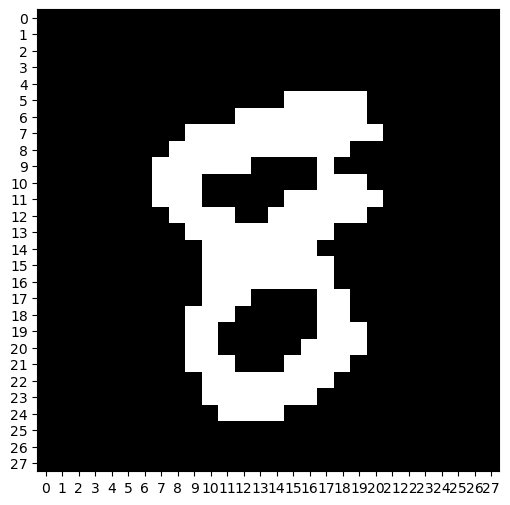

Label: 8
 - - - - - - - - - - - - - - - - - - - - 
Input shape: (1, 784)
After Layer 1 (x1) shape: (1, 64)
After Layer 2 (x2) shape: (1, 64)
After Layer 3 (x3) shape: (1, 32)
After Layer 4 (x4) shape: (1, 10)

Output logits:
[[ 8344897  3618803  4040705 14148360  4222350 12163343  2575704  8430062
  21020611 10564192]]

Predicted class: 8


In [88]:
# Function to visualize a digit (assuming binary input)
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def visualize_digit(tensor):
    digit_image = tensor.reshape(28, 28)
    
    # Set the figure size (increase width and height as needed)
    plt.figure(figsize=(6, 6))  # Example: Make the image 6x6 inches
    
    plt.imshow(digit_image, cmap='gray')
    
    # Add coordinates (ticks) for x and y axes
    plt.axis('on')  # Turn on the axes
    plt.xticks(range(0, 28, 1))  # x-axis ticks every 1 pixel
    plt.yticks(range(0, 28, 1))  # y-axis ticks every 1 pixel
    
    plt.show()


# Load a sample image from your test set
sample_idx = 45
sample = X_test[sample_idx:sample_idx+1]
visualize_digit(sample)

save_img(X_test, y_test, sample_idx)

print( " - - - - - - - - - - - - - - - - - - - - ")

# Convert tensor to numpy and cast to int64 for matrix multiplication
x = sample.numpy().astype(np.int64)
print(f"Input shape: {x.shape}")

# Layer 1: (1,784) @ (784,64) -> (1,64)
x1 = x @ matrices['matrix1']
x1 = np.maximum(0, x1)  # ReLU
print(f"After Layer 1 (x1) shape: {x1.shape}")

# Layer 2: (1,64) @ (64,64) -> (1,64)
x2 = x1 @ matrices['matrix2']
x2 = np.maximum(0, x2)  # ReLU
print(f"After Layer 2 (x2) shape: {x2.shape}")

# Layer 3: (1,64) @ (64,32) -> (1,32)
x3 = x2 @ matrices['matrix3']
x3 = np.maximum(0, x3)  # ReLU
print(f"After Layer 3 (x3) shape: {x3.shape}")

# Layer 4: (1,32) @ (32,10) -> (1,10)
x4 = x3 @ matrices['matrix4']
print(f"After Layer 4 (x4) shape: {x4.shape}")

# Output logits
output = x4
print("\nOutput logits:")
print(output)

# Predicted class
predicted_class = np.argmax(output)
print("\nPredicted class:", predicted_class)


In [29]:
def save_img(X_train, y_train, idx):
    # Randomly select an image index
    print(f"Label: {y_train[idx]}")
    
    # Get the corresponding image data (reshape to a 28x28 matrix)
    image_data = X_train[idx].numpy()  # Convert to numpy array
    image_data = image_data.reshape(28, 28)  # Reshape if needed
    
    # Open file to save the image data in MIF format
    with open(f'image.mif', 'w') as file:
        # Iterate through each pixel and write it as 32-bit unsigned hex
        for i in range(28):
            for j in range(28):
                pixel = image_data[i, j]
                # Convert pixel to integer (0 or 1)
                int_pixel = int(pixel)  
                # Convert the integer to a 32-bit unsigned number (mask to ensure 32-bit)
                unsigned_32bit = np.int32(int_pixel) & 0xFFFFFFFF
                # Write the 32-bit unsigned value in hex
                file.write(f'{unsigned_32bit:08X}\n')

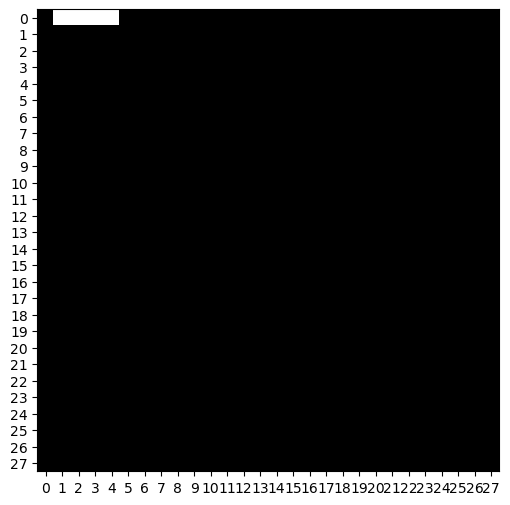

 - - - - - - - - - - - - - - - - - - - - 
Input shape: (1, 784)
After Layer 1 (x1) shape: (1, 64)
After Layer 2 (x2) shape: (1, 64)
After Layer 3 (x3) shape: (1, 32)
After Layer 4 (x4) shape: (1, 10)

Output logits:
[[ -854400   265040 -1319648  3703823  2351948  4049555  5992617  6247401
   4712302  1721500]]

Predicted class: 7


In [44]:
# Initialize input tensor with the first pixel as 1 and the rest as 0
x = np.zeros((1, 784), dtype=np.int64)
x[0, 1] = 1  # Set the first pixel to 1
x[0, 2] = 1  # Set the first pixel to 1
x[0, 3] = 1  # Set the first pixel to 1
x[0, 4] = 1  # Set the first pixel to 1

# Visualize the input tensor
visualize_digit(x)

print(" - - - - - - - - - - - - - - - - - - - - ")

# Load pre-defined weight matrices
# Ensure 'matrices' is a dictionary containing the neural network weight matrices
# matrices = {'matrix1': ..., 'matrix2': ..., 'matrix3': ..., 'matrix4': ...}

# Neural network pipeline
print(f"Input shape: {x.shape}")

# Layer 1: (1,784) @ (784,64) -> (1,64)
x1 = x @ matrices['matrix1']
x1 = np.maximum(0, x1)  # ReLU
print(f"After Layer 1 (x1) shape: {x1.shape}")

# Layer 2: (1,64) @ (64,64) -> (1,64)
x2 = x1 @ matrices['matrix2']
x2 = np.maximum(0, x2)  # ReLU
print(f"After Layer 2 (x2) shape: {x2.shape}")

# Layer 3: (1,64) @ (64,32) -> (1,32)
x3 = x2 @ matrices['matrix3']
x3 = np.maximum(0, x3)  # ReLU
print(f"After Layer 3 (x3) shape: {x3.shape}")

# Layer 4: (1,32) @ (32,10) -> (1,10)
x4 = x3 @ matrices['matrix4']
print(f"After Layer 4 (x4) shape: {x4.shape}")

# Output logits
output = x4
print("\nOutput logits:")
print(output)

# Predicted class
predicted_class = np.argmax(output)
print("\nPredicted class:", predicted_class)